### LAB 6 - ARIMA Modeling to Predict Average Home Prices

What follows is work for Lab 6. Initially we'll load all appropriate libraries, and then do some scrubbing of the data. Data is obtained from (files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv). Then commences a standard analysis of extracting data for specific items interested in exploring, and then follows a merging and melting sample, and plotting of particular items over time.

Post that, commences a model and prediction of prices in order to make a recommendation - using ARIMA - for a fictional Syracuse University Real Estate Investment Trust (REIT) on where to invest funds.

In [184]:
from pandas import Series
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core import datetools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from scipy.stats import boxcox
import seaborn as sns 
import os
import warnings
%matplotlib inline
import plotly
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

In [150]:
#os.chdir('/Users/nhoffelmeyer/downloads')
zip = pd.read_csv('Zillow_Data.csv')

In [151]:
zip.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1008100,1010800,1015000,1021200,1027600,1033000,1035400,1036200,1038400,1038400
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312300,313900,315100,316700,318900,321300,322500,323300,324100,324600
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320100,320400,320900,321200,322700,326300,330100,332400,334300,335600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1288000,1293000,1299500,1303200,1308700,1314100,1316300,1318500,1321600,1318200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120400,120400,120300,120400,120500,120700,121200,122100,122800


In [152]:
zip = zip.dropna()

In [153]:
zip.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
count,13150.000000,13150.000000,13150.000000,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,...,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04,1.315000e+04
mean,80965.863650,47473.394525,7139.665932,1.204022e+05,1.205257e+05,1.206477e+05,1.207666e+05,1.208972e+05,1.210484e+05,1.212458e+05,...,2.872864e+05,2.890650e+05,2.906979e+05,2.922710e+05,2.945746e+05,2.972879e+05,2.993491e+05,3.007980e+05,3.025219e+05,3.036183e+05
std,33354.707112,29862.588767,4353.439216,8.693276e+04,8.709021e+04,8.724795e+04,8.741076e+04,8.759811e+04,8.782421e+04,8.810979e+04,...,3.118142e+05,3.144410e+05,3.167914e+05,3.190546e+05,3.224445e+05,3.261799e+05,3.284780e+05,3.297673e+05,3.313427e+05,3.322148e+05
min,58196.000000,1001.000000,1.000000,1.140000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.420000e+04,1.430000e+04,1.420000e+04,1.400000e+04,1.400000e+04,1.360000e+04,1.320000e+04,1.300000e+04,1.340000e+04,1.420000e+04
25%,66626.250000,20755.250000,3371.250000,7.050000e+04,7.070000e+04,7.090000e+04,7.100000e+04,7.110000e+04,7.130000e+04,7.150000e+04,...,1.360000e+05,1.368000e+05,1.373000e+05,1.379000e+05,1.386000e+05,1.396250e+05,1.403000e+05,1.410000e+05,1.421000e+05,1.428000e+05
50%,77520.500000,45119.000000,6868.500000,1.014000e+05,1.015000e+05,1.015000e+05,1.016000e+05,1.017000e+05,1.018000e+05,1.018000e+05,...,2.013000e+05,2.027000e+05,2.037000e+05,2.050000e+05,2.065000e+05,2.086000e+05,2.102000e+05,2.115000e+05,2.133500e+05,2.144000e+05
75%,91030.500000,75237.750000,10818.750000,1.450000e+05,1.449000e+05,1.451000e+05,1.452000e+05,1.452000e+05,1.453750e+05,1.456000e+05,...,3.255000e+05,3.276000e+05,3.294750e+05,3.312750e+05,3.341750e+05,3.367000e+05,3.388750e+05,3.408750e+05,3.424000e+05,3.433750e+05
max,753844.000000,99901.000000,15245.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,7.436900e+06,7.454200e+06,7.408000e+06,7.372200e+06,7.394300e+06,7.473700e+06,7.550500e+06,7.614100e+06,7.628200e+06,7.598200e+06


In [154]:
# Filter the data frame to Arkansas
arkansas = zip.loc[zip['State'] == 'AR']

In [155]:
arkansas.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
271,89528,72401,Jonesboro,AR,Jonesboro,Craighead,272,51800.0,52000.0,52100.0,...,108500,108900,109600,110000,110300,110600,111300,111300,110700,110100
297,89249,71913,Hot Springs,AR,Hot Springs,Garland,298,82100.0,81900.0,81600.0,...,146300,147500,148300,147600,146500,146400,146900,146700,146600,147000
373,89712,72712,Bentonville,AR,Fayetteville,Benton,374,96200.0,96300.0,96400.0,...,219500,219200,218900,219200,221000,224000,227300,229500,231400,232200
600,89319,72034,Conway,AR,Little Rock,Faulkner,601,75600.0,76100.0,76700.0,...,171500,170500,169600,169100,169300,169700,169800,170000,170600,171200
801,89707,72701,Fayetteville,AR,Fayetteville,Washington,802,83100.0,83500.0,83700.0,...,195900,197800,200100,202300,205400,209700,213200,214800,215900,216900


In [156]:
# Keep only 1997 through 2013 columns - first we find out the column numbers
print(arkansas.columns.get_loc("1997-01"))
print(arkansas.columns.get_loc("2013-12"))

16
219


In [157]:
# Now get only columns that we need from the column index above (16 through 219)
ar_cols = arkansas.iloc[:,16:220]

In [158]:
# Now get just the first 6 columns with the metro and state information, etc.
ar = arkansas.iloc[:,0:7]

In [159]:
ar_full = ar.join(ar_cols)
ar_full2 = ar_full.iloc[:,[4]]
ar_full3 = ar_full2.join(ar_cols)
ar_full3.head()

,Metro,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,...,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12
271,Jonesboro,53000.0,53100.0,53200.0,53400.0,53500.0,53700.0,54000.0,54300.0,54700.0,...,92000.0,92600.0,92600.0,92800.0,93100.0,92900.0,92400.0,92600.0,93400.0,94200.0
297,Hot Springs,79200.0,78900.0,78800.0,78900.0,79200.0,79800.0,80600.0,81500.0,82500.0,...,132900.0,132700.0,132500.0,132900.0,133600.0,134200.0,134700.0,134900.0,135200.0,135600.0
373,Fayetteville,101400.0,103200.0,105300.0,107600.0,109800.0,111800.0,113600.0,114900.0,115800.0,...,151400.0,153100.0,154800.0,156900.0,159000.0,160700.0,162400.0,164100.0,165600.0,166800.0
600,Little Rock,82400.0,83400.0,84400.0,85300.0,86100.0,86900.0,87600.0,88200.0,88700.0,...,140100.0,143100.0,145500.0,146300.0,147100.0,148100.0,148500.0,148900.0,149500.0,150000.0
801,Fayetteville,83800.0,84400.0,85000.0,85500.0,85800.0,86000.0,86100.0,86100.0,86100.0,...,158000.0,158700.0,159400.0,159900.0,160400.0,160300.0,159700.0,159900.0,161000.0,161900.0


In [160]:
# Filter metro areas for time series plotting in Arkansas df
ar_metros = ar_full3.loc[ar['Metro'].isin(['Hot Springs','Little Rock','Fayetteville','Searcy'])]
            
ar_metros.head()

,Metro,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,...,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12
297,Hot Springs,79200.0,78900.0,78800.0,78900.0,79200.0,79800.0,80600.0,81500.0,82500.0,...,132900.0,132700.0,132500.0,132900.0,133600.0,134200.0,134700.0,134900.0,135200.0,135600.0
373,Fayetteville,101400.0,103200.0,105300.0,107600.0,109800.0,111800.0,113600.0,114900.0,115800.0,...,151400.0,153100.0,154800.0,156900.0,159000.0,160700.0,162400.0,164100.0,165600.0,166800.0
600,Little Rock,82400.0,83400.0,84400.0,85300.0,86100.0,86900.0,87600.0,88200.0,88700.0,...,140100.0,143100.0,145500.0,146300.0,147100.0,148100.0,148500.0,148900.0,149500.0,150000.0
801,Fayetteville,83800.0,84400.0,85000.0,85500.0,85800.0,86000.0,86100.0,86100.0,86100.0,...,158000.0,158700.0,159400.0,159900.0,160400.0,160300.0,159700.0,159900.0,161000.0,161900.0
1447,Little Rock,60400.0,60900.0,61400.0,61800.0,62200.0,62300.0,62400.0,62500.0,62500.0,...,89900.0,90000.0,89500.0,88400.0,87600.0,87900.0,88700.0,89300.0,89700.0,89700.0


In [161]:
# Group by averages of metros
ar_metro_groups = ar_metros.groupby(['Metro']).mean()
ar_metro_groups.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12
Metro,,,,,,,,,,,,,,,,,,,,,
Fayetteville,80366.666667,81004.761905,81647.619048,82247.619048,82700.000000,82980.952381,83104.761905,83066.666667,82938.095238,82761.904762,...,122695.238095,123566.666667,124514.285714,125614.285714,126519.047619,127219.047619,127871.428571,128600.000000,129171.428571,129690.476190
Hot Springs,72225.000000,72275.000000,72400.000000,72575.000000,72825.000000,73150.000000,73550.000000,73975.000000,74475.000000,74975.000000,...,129125.000000,129550.000000,129900.000000,130125.000000,130200.000000,130300.000000,130475.000000,130500.000000,130200.000000,130025.000000
Little Rock,86772.413793,87306.896552,87841.379310,88410.344828,88948.275862,89462.068966,89931.034483,90351.724138,90727.586207,91051.724138,...,138510.344828,139317.241379,139968.965517,140351.724138,140851.724138,141506.896552,142086.206897,142568.965517,142900.000000,143075.862069
Searcy,62180.000000,62440.000000,62680.000000,62960.000000,63220.000000,63500.000000,63780.000000,64080.000000,64340.000000,64580.000000,...,91540.000000,92420.000000,93500.000000,93740.000000,93740.000000,93980.000000,94480.000000,95120.000000,95440.000000,95440.000000


In [162]:
# NOW BACK TO MELT
fay = pd.melt((ar_metro_groups.filter(like = 'Fayetteville', axis=0)))
hotspr = pd.melt((ar_metro_groups.filter(like = 'Hot Springs', axis=0)))
littlerock = pd.melt((ar_metro_groups.filter(like = 'Little Rock', axis=0)))
searcy = pd.melt((ar_metro_groups.filter(like = 'Searcy', axis=0)))

In [163]:
# Start merging the data frames that we melted
ar_melt1 = fay.merge(hotspr, on='variable')
ar_melt1.columns=['variable','Fayetteville','Hot Springs']
ar_melt1.head()

,variable,Fayetteville,Hot Springs
0,1997-01,80366.666667,72225.0
1,1997-02,81004.761905,72275.0
2,1997-03,81647.619048,72400.0
3,1997-04,82247.619048,72575.0
4,1997-05,82700.000000,72825.0


In [164]:
# Continue merging by adding little rock
ar_melt2 = ar_melt1.merge(littlerock, on='variable')
ar_melt2.columns=['variable','Fayetteville','Hot Springs','Little Rock']
ar_melt2.head()

,variable,Fayetteville,Hot Springs,Little Rock
0,1997-01,80366.666667,72225.0,86772.413793
1,1997-02,81004.761905,72275.0,87306.896552
2,1997-03,81647.619048,72400.0,87841.379310
3,1997-04,82247.619048,72575.0,88410.344828
4,1997-05,82700.000000,72825.0,88948.275862


In [165]:
# Continue merging by adding searcy
ar_melt3 = ar_melt2.merge(searcy, on='variable')
ar_melt3.columns=['variable','Fayetteville','Hot Springs','Little Rock','Searcy']
ar_melt3.head()

,variable,Fayetteville,Hot Springs,Little Rock,Searcy
0,1997-01,80366.666667,72225.0,86772.413793,62180.0
1,1997-02,81004.761905,72275.0,87306.896552,62440.0
2,1997-03,81647.619048,72400.0,87841.379310,62680.0
3,1997-04,82247.619048,72575.0,88410.344828,62960.0
4,1997-05,82700.000000,72825.0,88948.275862,63220.0


In [166]:
# index on the 'variable' column for charting

# first set variable column to date format
ar_melt3.columns=['Date','Fayetteville','Hot Springs','Little Rock','Searcy'] # rename column for easy understanding
ar_melt3['Date'] = pd.to_datetime(ar_melt3['Date'])
ar_melt3.info()

# then set the index on that column
ar_melt3.set_index('Date', inplace=True)
ar_melt3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 5 columns):
Date            204 non-null datetime64[ns]
Fayetteville    204 non-null float64
Hot Springs     204 non-null float64
Little Rock     204 non-null float64
Searcy          204 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.6 KB


,Fayetteville,Hot Springs,Little Rock,Searcy
Date,,,,
1997-01-01,80366.666667,72225.0,86772.413793,62180.0
1997-02-01,81004.761905,72275.0,87306.896552,62440.0
1997-03-01,81647.619048,72400.0,87841.379310,62680.0
1997-04-01,82247.619048,72575.0,88410.344828,62960.0
1997-05-01,82700.000000,72825.0,88948.275862,63220.0


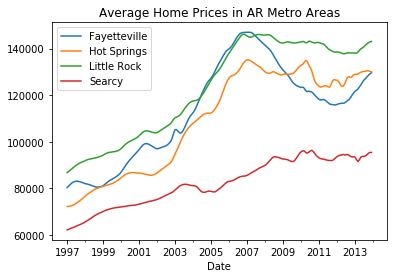

In [167]:
# Plot mean by metro?
ar_melt3.plot(title='Average Home Prices in AR Metro Areas')
plt.show()

### MODEL DEVELOPMENT

A simple search of fast growing metro areas yielded discovery of the following:

https://www.realtor.com/news/trends/americas-profitable-housing-markets/

According to realtor.com and their data team, they've identified the top markets in the US for "returns": growth of the prices and consequent value given back to home owners or investors. The following case study focuses on what realtor.com identified as the most profitable market of Bridgeport, CT, and attempts to predict mean home prices for three zip codes in that area, such that a recommendation for investment can be made to the SU REIT.

In [168]:
# Filter the data frame to Connecticut, and then to Bridgeport
ct = zip.loc[zip['State'] == 'CT']
ct_bridge = ct.loc[ct['City'] == 'Bridgeport']
ct_bridge.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
1334,60390,6606,Bridgeport,CT,Stamford,Fairfield,1335,87700.0,87700.0,87600.0,...,179300,181000,182600,184200,185800,186900,187300,187300,188500,189900
3795,60388,6604,Bridgeport,CT,Stamford,Fairfield,3796,98100.0,97900.0,97600.0,...,206600,211500,215400,216600,214400,210100,206400,204400,203700,203500
4743,60393,6610,Bridgeport,CT,Stamford,Fairfield,4744,79700.0,79700.0,79700.0,...,157000,158300,159900,161800,164500,166600,168300,169800,171300,171300


Now we can see that Bridgeport is a part of the Stamford metro area. Accordingly, knowing that this area specifically is growing, but given the research around the Bridgeport area being already public and consequently perhaps having missed the opportunity to obtain max ROI - we will broaden our search to the Stamford metro area. Why? because we can look there and see if there are 3 zip codes throughout the entire metro area that might outperform, and we can recommend those to SU REIT.

In [169]:
stamford = ct.loc[ct['Metro'].isin(['Stamford'])]
stamford.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
685,60454,6810,Danbury,CT,Stamford,Fairfield,686,151100.0,150700.0,150200.0,...,259600,262600,264600,266300,268300,269700,270500,271200,272800,274200
1334,60390,6606,Bridgeport,CT,Stamford,Fairfield,1335,87700.0,87700.0,87600.0,...,179300,181000,182600,184200,185800,186900,187300,187300,188500,189900
1365,60342,6484,Shelton,CT,Stamford,Fairfield,1366,186800.0,186300.0,185900.0,...,321600,322400,324100,325400,326800,328200,328800,329100,330500,331400
3582,60455,6811,Danbury,CT,Stamford,Fairfield,3583,176400.0,176100.0,175900.0,...,303300,306600,308600,308700,308700,309100,309400,309900,311400,312400
3795,60388,6604,Bridgeport,CT,Stamford,Fairfield,3796,98100.0,97900.0,97600.0,...,206600,211500,215400,216600,214400,210100,206400,204400,203700,203500


In [170]:
# Keep only 1997 through 2017 columns and just region names - we're going to plot the region names
"""print(stamford.columns.get_loc("1997-01"))
print(stamford.columns.get_loc("2017-12"))"""
"""print(stamford.columns.get_loc("RegionName"))
print(stamford.columns.get_loc("Metro"))"""

stamford_datecols = stamford.iloc[:,16:268]
stamford_infocols = stamford.iloc[:,1:5]
stamford_data = stamford_infocols.join(stamford_datecols)
stamford_data["CityZip"] = stamford_data["City"].map(str) + stamford_data["RegionName"].map(str) # create a new column
stamford_data.head()

,RegionName,City,State,Metro,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,CityZip
685,6810,Danbury,CT,Stamford,147200.0,147100.0,146900.0,146700.0,146600.0,146600.0,...,248600,250400,251000,252100,255200,259600,262600,264600,266300,Danbury6810
1334,6606,Bridgeport,CT,Stamford,87400.0,87600.0,87800.0,88100.0,88500.0,88800.0,...,175700,175900,175200,175400,177000,179300,181000,182600,184200,Bridgeport6606
1365,6484,Shelton,CT,Stamford,183600.0,183700.0,183800.0,184100.0,184400.0,184900.0,...,318500,318500,317800,318400,320400,321600,322400,324100,325400,Shelton6484
3582,6811,Danbury,CT,Stamford,175300.0,175500.0,175700.0,176000.0,176300.0,176700.0,...,297900,298600,297800,297500,299700,303300,306600,308600,308700,Danbury6811
3795,6604,Bridgeport,CT,Stamford,96700.0,96800.0,96800.0,96800.0,96800.0,96800.0,...,191900,193200,195600,198800,202600,206600,211500,215400,216600,Bridgeport6604


In [171]:
# Reorder the CityZip Column to front of DF
# get a list of columns
cols = list(stamford_data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('CityZip')))
cols
# use loc to reorder
stamford_cityzip = stamford_data.loc[:, cols]
stamford_cityzip.head()

,CityZip,RegionName,City,State,Metro,1997-01,1997-02,1997-03,1997-04,1997-05,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
685,Danbury6810,6810,Danbury,CT,Stamford,147200.0,147100.0,146900.0,146700.0,146600.0,...,246800,248600,250400,251000,252100,255200,259600,262600,264600,266300
1334,Bridgeport6606,6606,Bridgeport,CT,Stamford,87400.0,87600.0,87800.0,88100.0,88500.0,...,174200,175700,175900,175200,175400,177000,179300,181000,182600,184200
1365,Shelton6484,6484,Shelton,CT,Stamford,183600.0,183700.0,183800.0,184100.0,184400.0,...,318200,318500,318500,317800,318400,320400,321600,322400,324100,325400
3582,Danbury6811,6811,Danbury,CT,Stamford,175300.0,175500.0,175700.0,176000.0,176300.0,...,296900,297900,298600,297800,297500,299700,303300,306600,308600,308700
3795,Bridgeport6604,6604,Bridgeport,CT,Stamford,96700.0,96800.0,96800.0,96800.0,96800.0,...,191000,191900,193200,195600,198800,202600,206600,211500,215400,216600


In [172]:
# Remove columns we don't want - keeping just the CityZip column and the data columns. Group by CityZip, averages
stam_cityzip = stamford_cityzip.iloc[:,[0]]
#stam_cityzip.head()
stam_data = stamford_cityzip.loc[:,'1997-01':'2017-12']
stam_data.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
685,147200.0,147100.0,146900.0,146700.0,146600.0,146600.0,146600.0,146600.0,146800.0,147000.0,...,246800,248600,250400,251000,252100,255200,259600,262600,264600,266300
1334,87400.0,87600.0,87800.0,88100.0,88500.0,88800.0,89300.0,89700.0,90100.0,90500.0,...,174200,175700,175900,175200,175400,177000,179300,181000,182600,184200
1365,183600.0,183700.0,183800.0,184100.0,184400.0,184900.0,185500.0,186200.0,187000.0,187800.0,...,318200,318500,318500,317800,318400,320400,321600,322400,324100,325400
3582,175300.0,175500.0,175700.0,176000.0,176300.0,176700.0,177100.0,177400.0,177800.0,178200.0,...,296900,297900,298600,297800,297500,299700,303300,306600,308600,308700
3795,96700.0,96800.0,96800.0,96800.0,96800.0,96800.0,96900.0,97000.0,97300.0,97700.0,...,191000,191900,193200,195600,198800,202600,206600,211500,215400,216600


In [173]:
# Join the data frames above and group
stam_f = stam_cityzip.join(stam_data)
stam_f_group = stam_f.groupby(['CityZip']).mean()
stam_f_group

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CityZip,,,,,,,,,,,,,,,,,,,,,
Bethel6801,190500.0,190900.0,191200.0,191600.0,192000.0,192500.0,193000.0,193500.0,193900.0,194500.0,...,306900,308000,309100,309400,309400,310200,312700,315300,316200,315900
Bridgeport6604,96700.0,96800.0,96800.0,96800.0,96800.0,96800.0,96900.0,97000.0,97300.0,97700.0,...,191000,191900,193200,195600,198800,202600,206600,211500,215400,216600
Bridgeport6606,87400.0,87600.0,87800.0,88100.0,88500.0,88800.0,89300.0,89700.0,90100.0,90500.0,...,174200,175700,175900,175200,175400,177000,179300,181000,182600,184200
Bridgeport6610,80200.0,80400.0,80600.0,80600.0,80700.0,80700.0,80800.0,80900.0,80900.0,81000.0,...,150400,151100,151200,150600,151600,154200,157000,158300,159900,161800
Brookfield6804,209900.0,210200.0,210500.0,210700.0,210900.0,211100.0,211300.0,211500.0,211700.0,212000.0,...,346700,347300,346300,344900,345300,347900,351300,353900,354700,353800
Danbury6810,147200.0,147100.0,146900.0,146700.0,146600.0,146600.0,146600.0,146600.0,146800.0,147000.0,...,246800,248600,250400,251000,252100,255200,259600,262600,264600,266300
Danbury6811,175300.0,175500.0,175700.0,176000.0,176300.0,176700.0,177100.0,177400.0,177800.0,178200.0,...,296900,297900,298600,297800,297500,299700,303300,306600,308600,308700
Darien6820,562000.0,564100.0,565900.0,568200.0,571100.0,574500.0,578400.0,582600.0,587100.0,591900.0,...,1370800,1373100,1373100,1368300,1362600,1364400,1371100,1378600,1384800,1387000
New Canaan6840,712700.0,715900.0,718400.0,721200.0,724200.0,727200.0,730400.0,733600.0,736800.0,740400.0,...,1397400,1387200,1373000,1360900,1358100,1368100,1379700,1377700,1368900,1364700


In [174]:
# NOW BACK TO MELT
Bethel6801 = pd.melt((stam_f_group.filter(like = 'Bethel6801', axis=0)))
Bridgeport6604 = pd.melt((stam_f_group.filter(like = 'Bridgeport6604', axis=0)))
Bridgeport6606 = pd.melt((stam_f_group.filter(like = 'Bridgeport6606', axis=0)))
Bridgeport6610 = pd.melt((stam_f_group.filter(like = 'Bridgeport6610', axis=0)))
Brookfield6804 = pd.melt((stam_f_group.filter(like = 'Brookfield6804', axis=0)))
Danbury6810 = pd.melt((stam_f_group.filter(like = 'Danbury6810', axis=0)))
Danbury6811 = pd.melt((stam_f_group.filter(like = 'Danbury6811', axis=0)))
Darien6820 = pd.melt((stam_f_group.filter(like = 'Darien6820', axis=0)))
NewCanaan6840 = pd.melt((stam_f_group.filter(like = 'New Canaan6840', axis=0)))
Newtown6470 = pd.melt((stam_f_group.filter(like = 'Newtown6470', axis=0)))
Newtown6482 = pd.melt((stam_f_group.filter(like = 'Newtown6482', axis=0)))
Ridgefield6877 = pd.melt((stam_f_group.filter(like = 'Ridgefield6877', axis=0)))
Shelton6484 = pd.melt((stam_f_group.filter(like = 'Shelton6484', axis=0)))
Sherman6784 = pd.melt((stam_f_group.filter(like = 'Sherman6784', axis=0)))
Weston6883 = pd.melt((stam_f_group.filter(like = 'Weston6883', axis=0)))

In [175]:
# Start merging the data frames that we melted back together
stam_melt1 = Bethel6801.merge(Bridgeport6604, on='variable')
stam_melt1.columns=['variable','Bethel6801','Bridgeport6604']
stam_melt1.head()

,variable,Bethel6801,Bridgeport6604
0,1997-01,190500.0,96700.0
1,1997-02,190900.0,96800.0
2,1997-03,191200.0,96800.0
3,1997-04,191600.0,96800.0
4,1997-05,192000.0,96800.0


In [176]:
stam_melt2 = stam_melt1.merge(Bridgeport6606, on='variable')
stam_melt2.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606']
stam_melt2.head()

,variable,Bethel6801,Bridgeport6604,Bridgeport6606
0,1997-01,190500.0,96700.0,87400.0
1,1997-02,190900.0,96800.0,87600.0
2,1997-03,191200.0,96800.0,87800.0
3,1997-04,191600.0,96800.0,88100.0
4,1997-05,192000.0,96800.0,88500.0


In [177]:
stam_melt3 = stam_melt2.merge(Bridgeport6610, on='variable')
stam_melt3.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610']

stam_melt4 = stam_melt3.merge(Brookfield6804, on='variable')
stam_melt4.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804']

stam_melt5 = stam_melt4.merge(Danbury6810, on='variable')
stam_melt5.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810']

stam_melt6 = stam_melt5.merge(Danbury6811, on='variable')
stam_melt6.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811']

stam_melt7 = stam_melt6.merge(Darien6820, on='variable')
stam_melt7.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820']

stam_melt8 = stam_melt7.merge(NewCanaan6840, on='variable')
stam_melt8.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840']

stam_melt9 = stam_melt8.merge(Newtown6470, on='variable')
stam_melt9.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470']

stam_melt10 = stam_melt9.merge(Newtown6482, on='variable')
stam_melt10.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482']

stam_melt11 = stam_melt10.merge(Ridgefield6877, on='variable')
stam_melt11.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482','Ridgefield6877']

stam_melt12 = stam_melt11.merge(Shelton6484, on='variable')
stam_melt12.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482','Ridgefield6877',
                    'Shelton6484']

stam_melt13 = stam_melt12.merge(Sherman6784, on='variable')
stam_melt13.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482','Ridgefield6877',
                    'Shelton6484','Sherman6784']

stam_melt14 = stam_melt13.merge(Weston6883, on='variable')
stam_melt14.columns=['variable','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482','Ridgefield6877',
                    'Shelton6484','Sherman6784','Weston6883']

stam_graph = stam_melt14
stam_graph.columns=['Date','Bethel6801','Bridgeport6604','Bridgeport6606','Bridgeport6610','Brookfield6804',
                   'Danbury6810','Danbury6811','Darien6820','NewCanaan6840','Newtown6470','Newtown6482','Ridgefield6877',
                    'Shelton6484','Sherman6784','Weston6883']
stam_graph.tail()

,Date,Bethel6801,Bridgeport6604,Bridgeport6606,Bridgeport6610,Brookfield6804,Danbury6810,Danbury6811,Darien6820,NewCanaan6840,Newtown6470,Newtown6482,Ridgefield6877,Shelton6484,Sherman6784,Weston6883
247,2017-08,310200.0,202600.0,177000.0,154200.0,347900.0,255200.0,299700.0,1364400.0,1368100.0,366400.0,345500.0,613000.0,320400.0,393200.0,760000.0
248,2017-09,312700.0,206600.0,179300.0,157000.0,351300.0,259600.0,303300.0,1371100.0,1379700.0,370300.0,350300.0,615200.0,321600.0,398300.0,761200.0
249,2017-10,315300.0,211500.0,181000.0,158300.0,353900.0,262600.0,306600.0,1378600.0,1377700.0,373300.0,354100.0,616700.0,322400.0,403000.0,761000.0
250,2017-11,316200.0,215400.0,182600.0,159900.0,354700.0,264600.0,308600.0,1384800.0,1368900.0,374600.0,356000.0,618400.0,324100.0,408200.0,760200.0
251,2017-12,315900.0,216600.0,184200.0,161800.0,353800.0,266300.0,308700.0,1387000.0,1364700.0,374300.0,356100.0,618900.0,325400.0,412100.0,758800.0


In [178]:
# Reset the index to the date column

# first set date column to date format
stam_graph['Date'] = pd.to_datetime(stam_graph['Date'])
stam_graph.info()

# then set the index on that column
stam_graph.set_index('Date', inplace=True)
stam_graph.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 16 columns):
Date              252 non-null datetime64[ns]
Bethel6801        252 non-null float64
Bridgeport6604    252 non-null float64
Bridgeport6606    252 non-null float64
Bridgeport6610    252 non-null float64
Brookfield6804    252 non-null float64
Danbury6810       252 non-null float64
Danbury6811       252 non-null float64
Darien6820        252 non-null float64
NewCanaan6840     252 non-null float64
Newtown6470       252 non-null float64
Newtown6482       252 non-null float64
Ridgefield6877    252 non-null float64
Shelton6484       252 non-null float64
Sherman6784       252 non-null float64
Weston6883        252 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 33.5 KB


,Bethel6801,Bridgeport6604,Bridgeport6606,Bridgeport6610,Brookfield6804,Danbury6810,Danbury6811,Darien6820,NewCanaan6840,Newtown6470,Newtown6482,Ridgefield6877,Shelton6484,Sherman6784,Weston6883
Date,,,,,,,,,,,,,,,
1997-01-01,190500.0,96700.0,87400.0,80200.0,209900.0,147200.0,175300.0,562000.0,712700.0,231600.0,217600.0,358900.0,183600.0,243800.0,496400.0
1997-02-01,190900.0,96800.0,87600.0,80400.0,210200.0,147100.0,175500.0,564100.0,715900.0,232200.0,218000.0,360100.0,183700.0,244700.0,498800.0
1997-03-01,191200.0,96800.0,87800.0,80600.0,210500.0,146900.0,175700.0,565900.0,718400.0,232600.0,218400.0,361400.0,183800.0,245400.0,501100.0
1997-04-01,191600.0,96800.0,88100.0,80600.0,210700.0,146700.0,176000.0,568200.0,721200.0,233100.0,218900.0,362800.0,184100.0,246100.0,503300.0
1997-05-01,192000.0,96800.0,88500.0,80700.0,210900.0,146600.0,176300.0,571100.0,724200.0,233700.0,219400.0,364400.0,184400.0,246900.0,505600.0


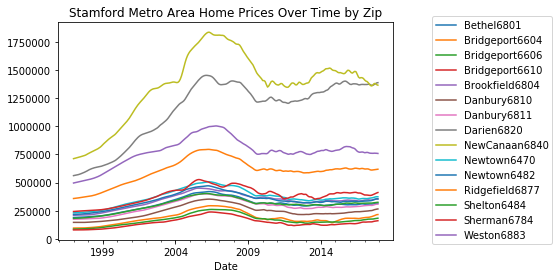

In [179]:
# Plot the different zips
stam_graph.plot(title='Stamford Metro Area Home Prices Over Time by Zip').legend(bbox_to_anchor=(1.1, 1.05))
plt.figure(figsize=(10, 7.55))
plt.show()

From the plot above, there are four clear highly increasing in price areas over the last 20 years of analysis (1997-2017: NewCanaan6840, Darien6820, and Brookfield 6804, and Bridgeport6604 look to have about the same increase over the period relative to where they started, with Brookfield maybe slightly higher. This is interesting, because the realtor article indicated highes profitability in Bridgeport areas, and yet our top 3 growth areas don't include Bridgeport, assuming Brookfield is a bit higher in the growth realm as mentioned above.

Next we'll pull out the data for NewCanaan6840, Darien6820, and Brookfield6804 to a new data frame, and arima model that to predict the first three months of data for 2017. We'll train on data through 2016, and use the first 3 months of 2017 as test set data.

In [180]:
# Keep just the NewCanaan6840, Darien6820, and Brookfield6804 columns
# first get iloc for each column
print(stam_graph.columns.get_loc("NewCanaan6840"))
print(stam_graph.columns.get_loc("Darien6820"))
print(stam_graph.columns.get_loc("Brookfield6804"))
# Cut out just the columns we want
stam_nc = stam_graph.iloc[:,[8]]
stam_d = stam_graph.iloc[:,[7]]
stam_b = stam_graph.iloc[:,[4]]

8
7
4


In [181]:
stam_arima = stam_nc.join(stam_d)
stam_arima_f = stam_arima.join(stam_b)
stam_arima_f

,NewCanaan6840,Darien6820,Brookfield6804
Date,,,
1997-01-01,712700.0,562000.0,209900.0
1997-02-01,715900.0,564100.0,210200.0
1997-03-01,718400.0,565900.0,210500.0
1997-04-01,721200.0,568200.0,210700.0
1997-05-01,724200.0,571100.0,210900.0
1997-06-01,727200.0,574500.0,211100.0
1997-07-01,730400.0,578400.0,211300.0
1997-08-01,733600.0,582600.0,211500.0
1997-09-01,736800.0,587100.0,211700.0


In [182]:
# Let's add a median column which we'll use to predict the median home prices across these three zip codes:
stam_arima_f['Median'] = stam_arima_f.median(numeric_only=True,axis=1)
stam_arima_f

,NewCanaan6840,Darien6820,Brookfield6804,Median
Date,,,,
1997-01-01,712700.0,562000.0,209900.0,562000.0
1997-02-01,715900.0,564100.0,210200.0,564100.0
1997-03-01,718400.0,565900.0,210500.0,565900.0
1997-04-01,721200.0,568200.0,210700.0,568200.0
1997-05-01,724200.0,571100.0,210900.0,571100.0
1997-06-01,727200.0,574500.0,211100.0,574500.0
1997-07-01,730400.0,578400.0,211300.0,578400.0
1997-08-01,733600.0,582600.0,211500.0,582600.0
1997-09-01,736800.0,587100.0,211700.0,587100.0


Create a dataframe that contains the future forecast values and concatenating that with the original data.

Plot this to view how well the prediction forecast matched up with the test set for which we have the real data:

# ARIMA Model Fitting


In [38]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [41]:
stam_arima = stam_arima_f.iloc[:,[3]]
stam_arima.head()

,Median
Date,
1997-01-01,562000.0
1997-02-01,564100.0
1997-03-01,565900.0
1997-04-01,568200.0
1997-05-01,571100.0


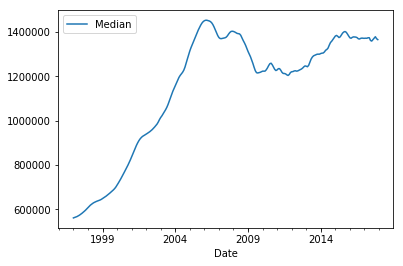

In [42]:
plt.figure(figsize=(14,4))
stam_arima.plot()

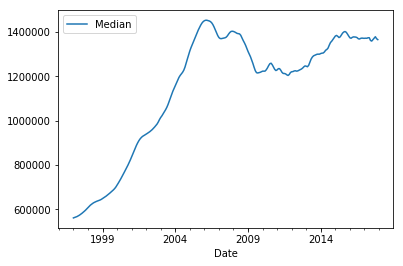

In [43]:
# Resample data by monthly
plt.figure(figsize=(14,4))
ts = stam_arima.resample('M').mean()
ts.plot()

In [44]:
# forward fill for nan values
ts = ts.ffill()

Perfom Dickey fuller test
Test Statistic                  -2.199638
p-value                          0.206377
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


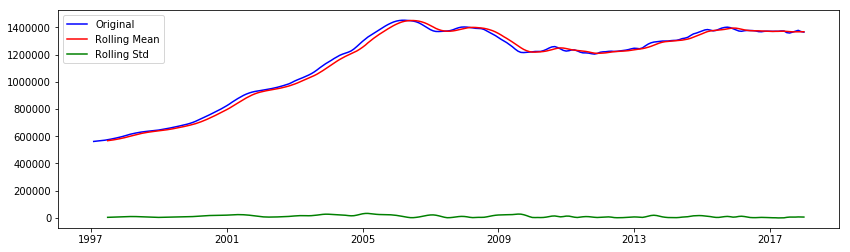

In [81]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 6).mean()
    rol_std = timeseries.rolling(window = 6).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(ts)

The rolling mean is increasing continualy, so time series is non stationary. ADF test also shows that we can't reject null.

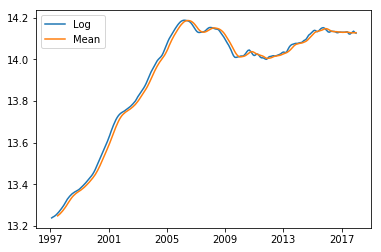

In [83]:
import numpy as np
#fig,ax = plt.subplots(1,2,figsize=(14,5))
#ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_ma = ts_log.rolling(6).mean()
ts_log_line, = plt.plot(ts_log, label='Log')
ts_ma_line, = plt.plot(ts_ma, label='Mean')
plt.legend(handles=[ts_log_line, ts_ma_line])

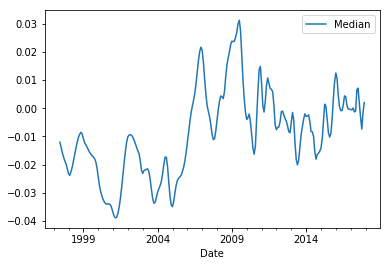

In [84]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -1.723930
p-value                          0.418827
#Lags Used                      16.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


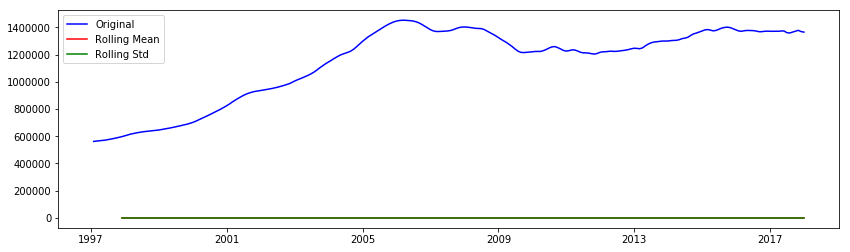

In [85]:
test_stationarity(ts_dif)

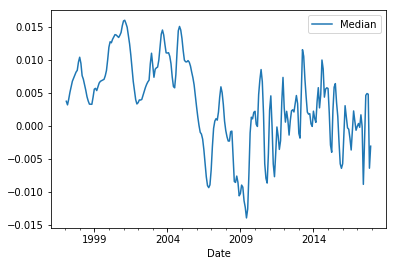

In [86]:
# Differencing to eliminate trend and seasonality
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -1.842067
p-value                          0.359786
#Lags Used                      14.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


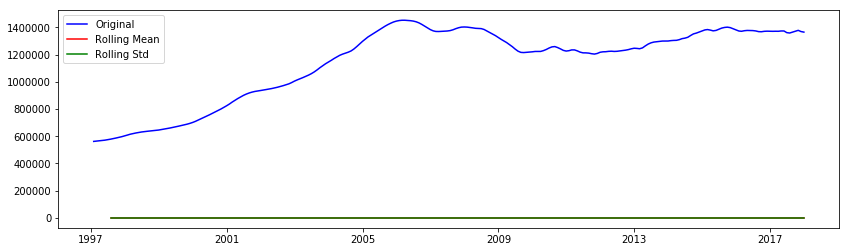

In [87]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

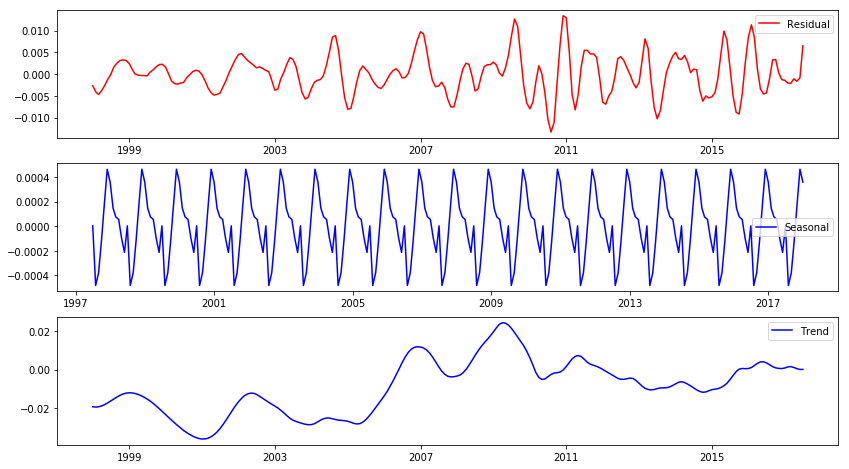

In [88]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

Perfom Dickey fuller test
Test Statistic                -6.424911e+00
p-value                        1.754271e-08
#Lags Used                     8.000000e+00
Number of Observations Used    2.260000e+02
Critical Value (1%)           -3.459620e+00
Critical Value (5%)           -2.874415e+00
Critical Value (10%)          -2.573632e+00
dtype: float64


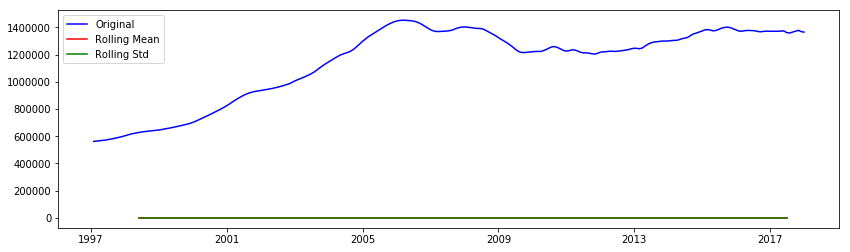

In [89]:
test_stationarity(docom.resid.dropna())

#### Forecasting with ARIMA

In [94]:
# ACF
lag_acf = acf(ts_dif,nlags=50)
#PACF
lag_pacf = pacf(ts_dif, nlags=50, method='ols')

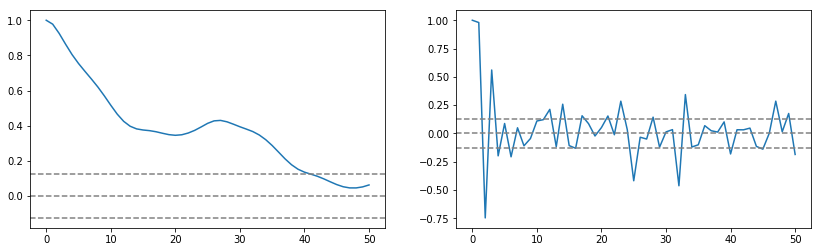

In [97]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

### The dotted lines in confidence interval, this can be used to determine p and q.
###### p: The lag value where the PACF chart crosses upper chart for first time.
###### q: The lag value where ACF chart crosses upper chart for first time. Here p =  1, q = 40, order = (1,40,1)

                              ARMA Model Results                              
Dep. Variable:                 Median   No. Observations:                  247
Model:                     ARMA(6, 2)   Log Likelihood                1234.298
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 23 Aug 2018   AIC                          -2448.597
Time:                        10:14:57   BIC                          -2413.503
Sample:                    06-30-1997   HQIC                         -2434.468
                         - 12-31-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0088      0.005     -1.700      0.091      -0.019       0.001
ar.L1.Median     0.5608      0.073      7.686      0.000       0.418       0.704
ar.L2.Median     0.7538      0.098      7.66

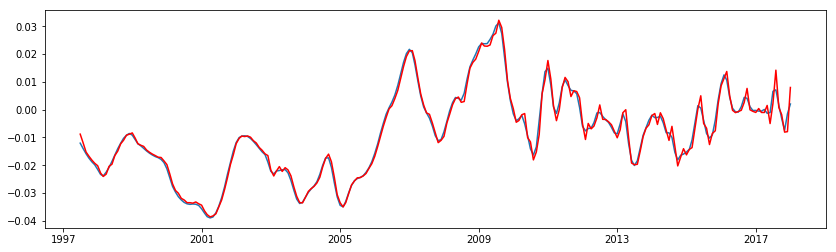

In [229]:
model = ARIMA(ts_dif, order = (6,0,2))
model_fit = model.fit(disp=5)
print(model_fit.summary())
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit.fittedvalues,color = 'r')

In [185]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
# Evaluate parameter
p_value = range(0,6)
d_value = range(0,2)
q_value = range(0,2)
warnings.filterwarnings("ignore")
evaluate_models(ts.values,p_value,d_value,q_value,)

ARIMA(0, 0, 0) MSE=46081626004.841
ARIMA(0, 0, 1) MSE=11571730359.959
ARIMA(0, 1, 0) MSE=34694951.768
ARIMA(0, 1, 1) MSE=18118585.162
ARIMA(1, 0, 0) MSE=31762265.843
ARIMA(1, 1, 0) MSE=18945883.309
ARIMA(2, 0, 0) MSE=19125935.722
ARIMA(2, 1, 0) MSE=19052075.699
ARIMA(2, 1, 1) MSE=17531640.968
ARIMA(3, 1, 1) MSE=17882088.202
ARIMA(4, 0, 0) MSE=21825623.515
ARIMA(4, 1, 1) MSE=18004336.499
ARIMA(5, 1, 1) MSE=18647467.344
Best ARIMA(2, 1, 1) MSE=17531640.968


The above model doesn't perform well. This is likely due to the fact that MSE doesn't really know what constitutes a "big error". We should probably use RMSE (root-mean-squared error) instead. However, we'll optimize our model from earlier with p, q, d = 6, 0, 1. It is optimized for a low AIC.

# USE THIS TO TRAIN, TEST, and PREDICT

In [220]:
# split the dataset
from pandas import Series
series = ts
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,4))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

Dataset 240, Validation 12
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  240
Model:                     ARMA(7, 4)   Log Likelihood               -2265.903
Method:                       css-mle   S.D. of innovations           2902.283
Date:                Thu, 23 Aug 2018   AIC                           4557.807
Time:                        10:08:28   BIC                           4603.055
Sample:                             0   HQIC                          4576.039
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.95e+04    2.1e+04      1.876      0.062   -1758.043    8.07e+04
ar.L1.y        2.4765      0.072     34.489      0.000       2.336       2.617
ar.L2.y       -1.7145    

In [226]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=12)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
month = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, months_in_year)
	print('Month %d: %f' % (month, inverted))
	history.append(inverted)
	month += 1

Month 1: 1378144.981408
Month 2: 1387929.131385
Month 3: 1396826.606695
Month 4: 1408287.678361
Month 5: 1411452.842236
Month 6: 1407349.488655
Month 7: 1410738.613435
Month 8: 1424312.750661
Month 9: 1439246.398740
Month 10: 1449721.339434
Month 11: 1444359.063108
Month 12: 1439675.540764
